# Binary Classification - Dense Network

### Import packages and functions

In [1]:
# Import packages and Load data

import tensorflow as tf
from tensorflow import keras
import tensorflow_addons as tfa


from functions_dataProcessing import *




### Load data

In [2]:
set_x,set_y = readXYfromDisk(noOfFiles=20,folder="../data/Train") #Training data
test_set_x,test_set_y = readXYfromDisk(noOfFiles=2,folder='../data/Test') 


X Shape :  (85064, 128, 128, 3) Memory size is : 3987.375 Mb Y Shape:  (85064,)
Values, counts, Avg Performance :  [0 1 2] [44005 20023 21036] [0.51731637 0.23538747 0.24729615]
X Shape :  (10060, 128, 128, 3) Memory size is : 471.5625 Mb Y Shape:  (10060,)
Values, counts, Avg Performance :  [0 1 2] [4988 2453 2619] [0.49582505 0.24383698 0.26033797]


### Convert from MultiClass to Binomial

* The target variable had values of 0, 1 and 2 indicating DOWN, No Change, UP
* New problem will be a binary classification with 0 and 1 indicating that the stock went DOWN or UP the following day


In [3]:
set_y[set_y == 1] = 0
set_y[set_y == 2] = 1

test_set_y[test_set_y == 1] = 0
test_set_y[test_set_y == 2] = 1

print('X Shape : ', set_x.shape, calcArrayMemorySize(set_x)
            ,'Y Shape: ',set_y.shape)
values, counts = np.unique(set_y, axis=0, return_counts=True)
print('Values, counts, Avg Performance : ', values,counts,counts / counts.sum())


print('Test X Shape : ', test_set_x.shape, calcArrayMemorySize(test_set_x)
            ,'Test Y Shape: ',test_set_y.shape)
values, counts = np.unique(test_set_y, axis=0, return_counts=True)
print('Values, counts, Avg Performance : ', values,counts,counts / counts.sum())



X Shape :  (85064, 128, 128, 3) Memory size is : 3987.375 Mb Y Shape:  (85064,)
Values, counts, Avg Performance :  [0 1] [64028 21036] [0.75270385 0.24729615]
Test X Shape :  (10060, 128, 128, 3) Memory size is : 471.5625 Mb Test Y Shape:  (10060,)
Values, counts, Avg Performance :  [0 1] [7441 2619] [0.73966203 0.26033797]


### Define Model Parameter and Metrics

In [4]:
# Define parameters
IMG_SIZE = 128
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]


### Simple Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),   
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(1,activation='sigmoid')
])

print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
                ,loss=tf.keras.losses.binary_crossentropy
                ,metrics=[METRICS])




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
rescaling (Rescaling)        (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6291584   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 6,291,713
Trainable params: 6,291,713
Non-trainable params: 0
_________________________________________________________________
None


<AxesSubplot:>

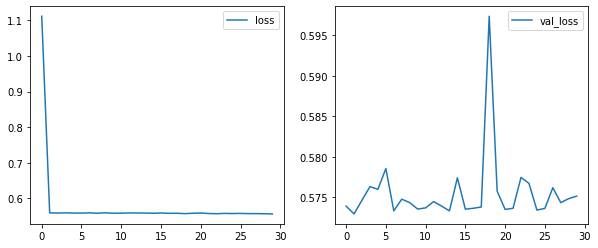

In [6]:
history = model.fit(set_x, set_y
                    ,batch_size = 256
                    ,epochs=30
                    ,verbose=0
                    ,validation_data=(test_set_x,test_set_y)
                    ,workers=6
                    ,use_multiprocessing=True)

df = pd.DataFrame(history.history)

plts,axs = plt.subplots(1,2,figsize=(10, 4))
df[["loss"]].plot(ax=axs[0])
df[["val_loss"]].plot(ax=axs[1])



In [9]:
### Increase Capacity

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),   
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(64, activation='relu'),        
    tf.keras.layers.Dense(64, activation='relu'),        
    tf.keras.layers.Dense(16, activation='relu'),        
    tf.keras.layers.Dense(16, activation='relu'),        
    tf.keras.layers.Dense(1,activation='sigmoid')
])

print(model.summary())

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
                ,loss=tf.keras.losses.binary_crossentropy
                ,metrics=[METRICS])


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 49152)             0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 49152)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               25166336  
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_18 (Dense)             (None, 128)              

<AxesSubplot:>

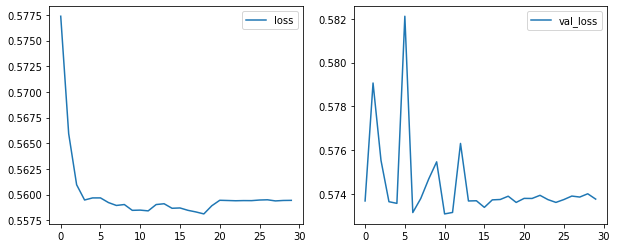

In [14]:
history = model.fit(set_x, set_y
                    ,batch_size = 256
                    ,epochs=30
                    ,verbose=0
                    ,validation_data=(test_set_x,test_set_y)
                    ,workers=6
                    ,use_multiprocessing=True)

df = pd.DataFrame(history.history)

plts,axs = plt.subplots(1,2,figsize=(10, 4))
df[["loss"]].plot(ax=axs[0])
df[["val_loss"]].plot(ax=axs[1])

### Increase learning rate from 0.001 to 0.01

<AxesSubplot:>

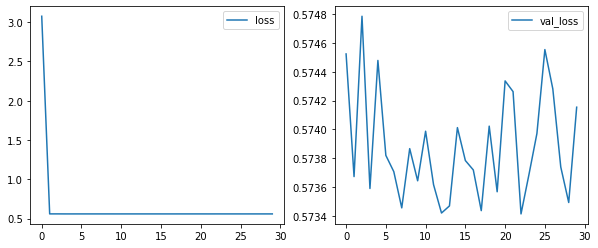

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),   
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(64, activation='relu'),        
    tf.keras.layers.Dense(64, activation='relu'),        
    tf.keras.layers.Dense(16, activation='relu'),        
    tf.keras.layers.Dense(16, activation='relu'),        
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
                ,loss=tf.keras.losses.binary_crossentropy
                ,metrics=[METRICS])

history = model.fit(set_x, set_y
                    ,batch_size = 256
                    ,epochs=30
                    ,verbose=0
                    ,validation_data=(test_set_x,test_set_y)
                    ,workers=6
                    ,use_multiprocessing=True)

df = pd.DataFrame(history.history)

plts,axs = plt.subplots(1,2,figsize=(10, 4))
df[["loss"]].plot(ax=axs[0])
df[["val_loss"]].plot(ax=axs[1])

### Decrease learning rate from 0.001 to 0.0001

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),   
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(256, activation='relu'),    
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(128, activation='relu'),        
    tf.keras.layers.Dense(64, activation='relu'),        
    tf.keras.layers.Dense(64, activation='relu'),        
    tf.keras.layers.Dense(16, activation='relu'),        
    tf.keras.layers.Dense(16, activation='relu'),        
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
                ,loss=tf.keras.losses.binary_crossentropy
                ,metrics=[METRICS])

history = model.fit(set_x, set_y
                    ,batch_size = 256
                    ,epochs=30
                    ,verbose=0
                    ,validation_data=(test_set_x,test_set_y)
                    ,workers=6
                    ,use_multiprocessing=True)

df = pd.DataFrame(history.history)

plts,axs = plt.subplots(1,2,figsize=(10, 4))
df[["loss"]].plot(ax=axs[0])
df[["val_loss"]].plot(ax=axs[1])

In [13]:
import joblib
#joblib.dump(df, "history.pkl") 
#my_model_loaded = joblib.load("my_model.pkl")

['history.pkl']

In [18]:
df

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc
0,0.593651,39812.0,42614.0,1391.0,1247.0,0.244439,0.483003,0.969629,0.519968,1.898607,0.0,1.0,4987.0,5072.0,0.495726,0.000000,0.000000,0.520772
1,0.577246,40912.0,43781.0,224.0,147.0,0.237221,0.483062,0.996420,0.535408,0.647245,3441.0,3146.0,1842.0,1631.0,0.349602,0.522393,0.678431,0.530192
2,0.572872,40841.0,43676.0,329.0,218.0,0.237903,0.483228,0.994691,0.543699,0.556974,5071.0,4981.0,7.0,1.0,0.244433,0.504477,0.999803,0.531806
3,0.570527,40746.0,43566.0,439.0,313.0,0.238656,0.483276,0.992377,0.548739,0.599927,4477.0,4261.0,727.0,595.0,0.288370,0.512360,0.882689,0.537409
4,0.567919,40699.0,43411.0,594.0,360.0,0.240019,0.483878,0.991232,0.552775,0.576410,5072.0,4988.0,0.0,0.0,0.243837,0.504175,1.000000,0.536453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.452040,36320.0,33760.0,10245.0,4739.0,0.322204,0.518265,0.884581,0.631520,1.387385,5072.0,4988.0,0.0,0.0,0.243837,0.504175,1.000000,0.510346
96,0.453503,36400.0,33907.0,10098.0,4659.0,0.320900,0.517729,0.886529,0.630121,0.998142,2030.0,1841.0,3147.0,3042.0,0.411431,0.524412,0.400237,0.519636
97,0.450649,36291.0,33800.0,10205.0,4768.0,0.321781,0.517770,0.883874,0.631988,3.088125,5072.0,4988.0,0.0,0.0,0.243837,0.504175,1.000000,0.500000
98,0.450679,36412.0,33962.0,10043.0,4647.0,0.320394,0.517407,0.886821,0.630702,1.052729,5068.0,4980.0,8.0,4.0,0.244433,0.504379,0.999211,0.520553


<AxesSubplot:>

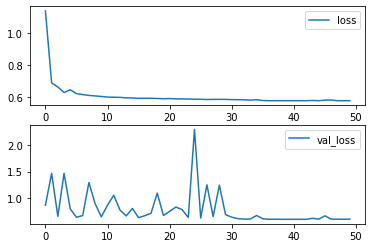

In [6]:
plts,axs = plt.subplots(2,1)
df[["loss"]].plot(ax=axs[0])
df[["val_loss"]].plot(ax=axs[1])



### Increase Capacity and Regularise

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),   
    tf.keras.layers.Dense(256, activation='relu'
                            ,kernel_regularizer=(keras.regularizers.l2())),    
    tf.keras.layers.Dense(256, activation='relu'
                            ,kernel_regularizer=(keras.regularizers.l2())),    
    tf.keras.layers.Dense(256, activation='relu'
                            ,kernel_regularizer=(keras.regularizers.l2())),    
    tf.keras.layers.Dense(256, activation='relu'
                            ,kernel_regularizer=(keras.regularizers.l2())),    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

print(model.summary())

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)
                ,loss=tf.keras.losses.binary_crossentropy
                ,metrics=[METRICS])




In [9]:

history = model.fit(set_x, set_y
                    ,batch_size = 256
                    ,epochs=50
                    ,verbose=1
                    ,validation_data=(test_set_x,test_set_y)
                    ,workers=6
                    ,use_multiprocessing=True)

df = pd.DataFrame(history.history)


Epoch 1/50
333/333 [==============================] - 15s 46ms/step - loss: 1.9157 - tp: 530.0000 - fp: 1602.0000 - tn: 62426.0000 - fn: 20506.0000 - accuracy: 0.7401 - precision: 0.2486 - recall: 0.0252 - auc: 0.5010 - val_loss: 0.9614 - val_tp: 2619.0000 - val_fp: 7441.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.2603 - val_precision: 0.2603 - val_recall: 1.0000 - val_auc: 0.4930
Epoch 2/50
333/333 [==============================] - 15s 44ms/step - loss: 0.6271 - tp: 119.0000 - fp: 380.0000 - tn: 63648.0000 - fn: 20917.0000 - accuracy: 0.7496 - precision: 0.2385 - recall: 0.0057 - auc: 0.5021 - val_loss: 0.7325 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 7441.0000 - val_fn: 2619.0000 - val_accuracy: 0.7397 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4902
Epoch 3/50
333/333 [==============================] - 15s 44ms/step - loss: 0.5958 - tp: 11.0000 - fp: 40.0000 - tn: 63988.0000 - fn: 21025.0000 - accuracy: 0.7524 - precision: 0.2157

<AxesSubplot:>

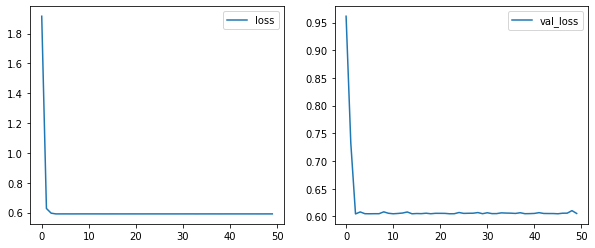

In [24]:

plts,axs = plt.subplots(1,2,figsize=(10, 4))
df[["loss"]].plot(ax=axs[0])
df[["val_loss"]].plot(ax=axs[1])
